# Task 3 extra: Predictive Analysis

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve

## Loading the extra Customer Profile model

In [69]:
extra_customer_profile = pd.read_csv('../dataset/extra_customer_profile_kmeans.csv', sep='\t', index_col=0)
extra_customer_profile

,Savg,categ_-1,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,categ_6,categ_7,categ_8,categ_9,categ_10,categ_11,categ_12,cluster
CustomerID,,,,,,,,,,,,,,,,
12347.0,2.777935,30.800315,0.000000,3.946407,0.416874,1.784220,1.292309,0.000000,20.610248,0.630869,18.487804,3.518416,2.863646,1.914285,13.734607,1
12348.0,2.417438,76.538677,0.000000,7.490694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.970629,0.000000,0.000000,0.000000,0.000000,1
12349.0,3.163623,49.563308,0.000000,3.478440,0.000000,4.142568,5.948338,0.000000,0.000000,4.389558,23.134712,2.377277,0.000000,1.855168,5.110631,1
12350.0,2.468938,59.239130,0.000000,6.725543,0.000000,0.000000,6.725543,0.000000,0.000000,0.000000,20.584239,0.000000,0.000000,0.000000,6.725543,1
12352.0,2.324080,38.106226,0.000000,9.900349,0.000000,9.459385,1.580515,1.173533,1.185387,13.181498,16.558270,1.327633,2.109988,5.417217,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,2.256718,53.626800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.611296,8.471761,0.000000,0.000000,0.000000,21.290144,0.000000,1
18281.0,1.907519,0.000000,0.000000,41.945063,0.000000,0.000000,0.000000,0.000000,0.000000,18.930958,0.000000,0.000000,0.000000,39.123979,0.000000,1
18282.0,1.945961,31.036240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.223103,7.644394,7.219706,2.853907,10.022650,1


In [70]:
extra_customer_profile = extra_customer_profile.to_numpy()

In [71]:
def plot_learning_curve(pipeline, X, y, scorer='accuracy', cv=5, train_sizes=np.linspace(.1, 1.0, 5), 
                        shuffle=False, random_state=None):

    train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, train_sizes=train_sizes, cv=cv,
                                                            scoring=scorer, n_jobs=-1, shuffle=shuffle,
                                                            random_state=random_state)

    mean_train_score = np.mean(train_scores, axis=1)
    std_train_score = np.std(train_scores, axis=1)
    mean_test_score = np.mean(test_scores, axis=1)
    std_test_score = np.std(test_scores, axis=1)

    plt.title(str(pipeline['estimator'].__class__.__name__) + ' learning curve')
    plt.xlabel('training set size')
    plt.ylabel('score')

    plt.plot(train_sizes, mean_train_score, label='train score', color='navy', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_train_score + std_train_score,
                     mean_train_score - std_train_score, color='navy', alpha=0.2)
    plt.plot(train_sizes, mean_test_score, label='cross-validation score', color='darkorange', marker='.', lw=2)
    plt.fill_between(train_sizes, mean_test_score + std_test_score,
                     mean_test_score - std_test_score, color='darkorange', alpha=0.2)

    plt.legend().get_frame().set_facecolor('white')
    plt.show()
    
def highlight_equal(s, value, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] == value
    return ['background-color: lightyellow' if is_max.any() else '' for v in is_max]

## SVC

In [72]:
from sklearn.svm import SVC

In [73]:
X, y = extra_customer_profile[:, :-1], extra_customer_profile[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

pipeline = Pipeline([('scaler', StandardScaler()), 
                     ('estimator', SVC())])

tuned_parameters = {'estimator__kernel': ('linear', 'poly', 'rbf'),
                    'estimator__C': (0.1, 1, 10, 100, 1000)}

grid = GridSearchCV(pipeline,
                    param_grid=tuned_parameters,
                    scoring='accuracy',
                    cv=5,  # 5 fold cross validation
                    n_jobs=-1,  # use all processors
                    refit=True,  # refit the best model on the full development set
                    return_train_score=True,
                    verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.1s finished


In [74]:
df = pd.DataFrame(grid.cv_results_)[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')
df.rename(columns={'mean_test_score': 'mean_val_score', 
                   'rank_test_score': 'rank_val_score'}, inplace=True)

df.head(15).style.apply(highlight_equal, value=1, column=['rank_val_score'], axis=1).hide_index()

params,mean_train_score,mean_val_score,rank_val_score
"{'estimator__C': 1000, 'estimator__kernel': 'linear'}",1.000000,0.997462,1
"{'estimator__C': 10, 'estimator__kernel': 'linear'}",0.998811,0.997145,2
"{'estimator__C': 100, 'estimator__kernel': 'linear'}",0.999683,0.997144,3
"{'estimator__C': 1, 'estimator__kernel': 'linear'}",0.997067,0.995244,4
"{'estimator__C': 0.1, 'estimator__kernel': 'linear'}",0.994769,0.992388,5
"{'estimator__C': 1000, 'estimator__kernel': 'rbf'}",1.000000,0.985412,6
"{'estimator__C': 100, 'estimator__kernel': 'rbf'}",1.000000,0.985095,7
"{'estimator__C': 10, 'estimator__kernel': 'rbf'}",0.998573,0.984461,8
"{'estimator__C': 1, 'estimator__kernel': 'rbf'}",0.993025,0.984461,9
"{'estimator__C': 0.1, 'estimator__kernel': 'rbf'}",0.974001,0.967343,10


In [75]:
accuracy_score(grid.best_estimator_.predict(X_test), y_test)

0.9990494296577946

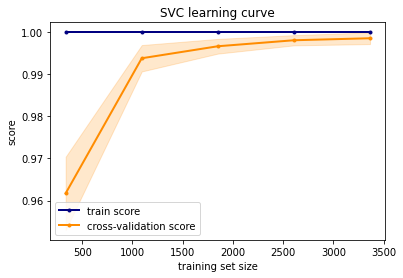

In [76]:
plot_learning_curve(grid.best_estimator_, X, y)

## Neural Network

## Naive Bayes

## Random Forest

## Decision Tree

## K-Nearest Neighbors